In [1]:
# Idea: image of The Brick from... Spitzer (maybe steal the Spitzer one Adam has used for JWST stuff)
# with square on it showing our pointing, then the three-panel plot below

In [2]:
import matplotlib.pyplot as plt
import numpy as np

SM_SIZE = 10
MD_SIZE = 14
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

In [3]:
# ls /orange/adamginsburg/jwst/brick/images/

In [4]:
from astropy import wcs, units as u
from astropy.io import fits

In [6]:
# Abandoning above stuff for now, more stealing from Adam below
tgt_header = fits.getheader("/orange/adamginsburg/jwst/brick/images/jw02221-o001_t001_nircam_clear-f410m_i2d_reprj_f410.fits")

ww = wcs.WCS(tgt_header)
ww.calc_footprint()

from astropy import coordinates
import regions
poly = regions.PolygonSkyRegion(coordinates.SkyCoord(ww.calc_footprint()[:,0], ww.calc_footprint()[:,1], unit=(u.deg, u.deg), frame=ww.wcs.radesys.lower()))

i1 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I1.fits')
i2 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I2.fits')
i3 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I3.fits')
i4 = fits.open('/orange/adamginsburg/spitzer/GLIMPSE/GLM_00000+0000_mosaic_I4.fits')
m24 = fits.open('/orange/adamginsburg/spitzer/mips/MG0000n005_024.fits')

wwspitz = wcs.WCS(i1[0].header)
polymask = poly.to_pixel(wwspitz).to_mask()

In [7]:
tgt_header_spitzer = tgt_header.copy()
tgt_header_spitzer['NAXIS1'] = tgt_header_spitzer['NAXIS1'] // 4
tgt_header_spitzer['NAXIS2'] = tgt_header_spitzer['NAXIS2'] // 4
tgt_header_spitzer['CRPIX1'] /= 4
tgt_header_spitzer['CRPIX2'] /= 4
tgt_header_spitzer['CDELT1'] *= 4
tgt_header_spitzer['CDELT2'] *= 4

In [8]:
import reproject
i1r,_ = reproject.reproject_interp(i1, tgt_header_spitzer)
i2r,_ = reproject.reproject_interp(i2, tgt_header_spitzer)
i3r,_ = reproject.reproject_interp(i3, tgt_header_spitzer)
i4r,_ = reproject.reproject_interp(i4, tgt_header_spitzer)
mipsr,_ = reproject.reproject_interp(m24, tgt_header_spitzer)

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
rgb_spitzer = np.array([
    (i4r),
    (i2r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

rgb_spitzer_234 = np.array([
    (i4r),
    (i3r),
    (i2r),
]).swapaxes(0,2).swapaxes(0,1)

rgb_spitzer_134 = np.array([
    (i4r),
    (i3r),
    (i1r),
]).swapaxes(0,2).swapaxes(0,1)

rgb_spitzer_mips = np.array([
    (mipsr),
    (i4r),
    (i2r),
]).swapaxes(0,2).swapaxes(0,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


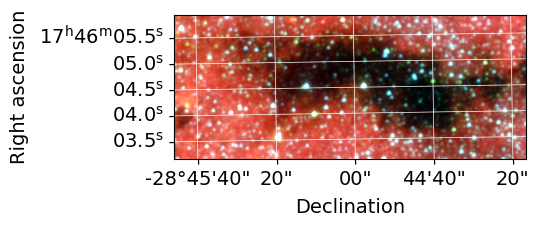

In [13]:
from astropy.visualization import simple_norm

fig = plt.figure(figsize=(10,24)) # 24,10

ax = plt.subplot(121, projection=ww)

rgb_spitzer_scaled = np.array([simple_norm(rgb_spitzer[:,:,0], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,0]),
                               simple_norm(rgb_spitzer[:,:,1], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,1]),
                               simple_norm(rgb_spitzer[:,:,2], stretch='asinh', min_percent=0.1, max_percent=99.)(rgb_spitzer[:,:,2])]).swapaxes(0,2).swapaxes(0,1)

ax.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')

# Labeling stuff
ra = ax.coords['ra']
# ra.set_ticks(spacing=0.5 * u.arcmin)
dec = ax.coords['dec']
# dec.set_ticks(spacing=0.5 * u.arcmin)

ra.grid(color='w', linewidth = 0.5) # b
dec.grid(color='w', linewidth = 0.5) # r
dec.set_axislabel('Declination')
ra.set_axislabel('Right ascension')

dec.set_ticks_position('b') # bt
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
ra.set_ticks_position('l') # lr
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')

# plt.xticks([]);
# plt.yticks([]);